In [1]:
from PathPlanningEnv_complex import PathPlanningEnv
from FCNN import FCNN
from run import TrainMemorize, TrainQlearning, PlayOnce
from utility import MovingAveragePlot, VectorFieldPlot
import settings
from matplotlib import pyplot as plt
from Q_Network import Q_Network
import time

In [2]:
model_settings = {
    'height' : 10,
    'width' : 10,
    'obs_count' : 30,
    'random_seed' : 142
}

env = PathPlanningEnv(**model_settings)
env.display()

['  ', '  ', '  ', '  ', 'H1', '  ', '  ', '  ', 'H2', '  ']
['  ', 'H2', 'O ', '  ', '  ', 'T1', '  ', '  ', '  ', '  ']
['  ', 'O ', '  ', '  ', '  ', '  ', 'H2', '  ', '  ', '  ']
['  ', 'H1', '  ', 'O ', 'P ', '  ', 'O ', 'H1', '  ', '  ']
['H1', '  ', 'O ', '  ', 'H2', 'O ', '  ', '  ', '  ', '  ']
['  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ']
['O ', 'T2', 'H2', '  ', '  ', '  ', 'O ', '  ', 'H2', '  ']
['  ', 'H2', '  ', 'H1', 'H2', '  ', '  ', 'H2', '  ', '  ']
['  ', 'O ', '  ', '  ', '  ', '  ', '  ', 'O ', 'H1', '  ']
['  ', '  ', '  ', '  ', 'H1', 'H2', '  ', 'H1', 'H2', '  ']


## Q-learning with CNN

In [3]:
network_cnn = Q_Network(
    BatchSize = 1,
    MapHeight = model_settings['height'],
    MapWidth = model_settings['width'],
    Covn1OutChan = 8,
    Conv1Kernel = 3,
    Covn2OutChan = 8,
    Conv2Kernel = 3,
    HiddenSize = 64
)

In [4]:
env = PathPlanningEnv(**model_settings)
env.display()

['  ', '  ', '  ', '  ', 'H1', '  ', '  ', '  ', 'H2', '  ']
['  ', 'H2', 'O ', '  ', '  ', 'T1', '  ', '  ', '  ', '  ']
['  ', 'O ', '  ', '  ', '  ', '  ', 'H2', '  ', '  ', '  ']
['  ', 'H1', '  ', 'O ', 'P ', '  ', 'O ', 'H1', '  ', '  ']
['H1', '  ', 'O ', '  ', 'H2', 'O ', '  ', '  ', '  ', '  ']
['  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ']
['O ', 'T2', 'H2', '  ', '  ', '  ', 'O ', '  ', 'H2', '  ']
['  ', 'H2', '  ', 'H1', 'H2', '  ', '  ', 'H2', '  ', '  ']
['  ', 'O ', '  ', '  ', '  ', '  ', '  ', 'O ', 'H1', '  ']
['  ', '  ', '  ', '  ', 'H1', 'H2', '  ', 'H1', 'H2', '  ']


In [11]:
config = settings.Config(epsilon=0.9, epsilon_low = 0.1, epsilon_step = 0.05, max_play_length=500, epochs = 2000, gamma = 0.9)
start_time = time.time()

env.grid_initial[0, env.init_row, env.init_col] = 0
env.grid_initial[0, 0, 0] = 1

env.init_row = 0
env.init_col = 0
env.reset()
env.display()

rewards, losses = TrainQlearning(network_cnn, env, config)

env.grid_initial[0, 0, 0] = 0
env.grid_initial[0, 9, 9] = 1

env.init_row = 9
env.init_col = 9
env.reset()
env.display()
rewards, losses = TrainQlearning(network_cnn, env, config, reset_model = 0)

env.grid_initial[0, 9, 9] = 0
env.grid_initial[0, 0, 9] = 1

env.init_row = 0
env.init_col = 9
env.reset()
env.display()
rewards, losses = TrainQlearning(network_cnn, env, config, reset_model = 0)

env.grid_initial[0, 0, 9] = 0
env.grid_initial[0, 9, 0] = 1

env.init_row = 9
env.init_col = 0
env.reset()
env.display()
rewards, losses = TrainQlearning(network_cnn, env, config, reset_model = 0)

env.grid_initial[0, 9, 0] = 0
env.grid_initial[0, 4, 4] = 1

env.init_row = 4
env.init_col = 4
env.reset()
env.display()
rewards, losses = TrainQlearning(network_cnn, env, config, reset_model = 0)

end_time = time.time()
print('Training time: %d seconds' % (end_time - start_time))

['P ', '  ', '  ', '  ', 'H1', '  ', '  ', '  ', 'H2', '  ']
['  ', 'H2', 'O ', '  ', '  ', 'T1', '  ', '  ', '  ', '  ']
['  ', 'O ', '  ', '  ', '  ', '  ', 'H2', '  ', '  ', '  ']
['  ', 'H1', '  ', 'O ', '  ', '  ', 'O ', 'H1', '  ', '  ']
['H1', '  ', 'O ', '  ', 'H2', 'O ', '  ', '  ', '  ', '  ']
['  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ', '  ']
['O ', 'T2', 'H2', '  ', '  ', '  ', 'O ', '  ', 'H2', '  ']
['  ', 'H2', '  ', 'H1', 'H2', '  ', '  ', 'H2', '  ', '  ']
['  ', 'O ', '  ', '  ', '  ', '  ', '  ', 'O ', 'H1', '  ']
['  ', '  ', '  ', '  ', 'H1', 'H2', '  ', 'H1', 'H2', '  ']
play round: 100, ave reward (last 100): 0.1314
play round: 200, ave reward (last 100): 0.2089
play round: 300, ave reward (last 100): 0.2980
play round: 400, ave reward (last 100): 0.3473
play round: 500, ave reward (last 100): 0.2624
play round: 600, ave reward (last 100): 0.3737
play round: 700, ave reward (last 100): 0.4289
play round: 800, ave reward (last 100): 0.4120
play round: 90

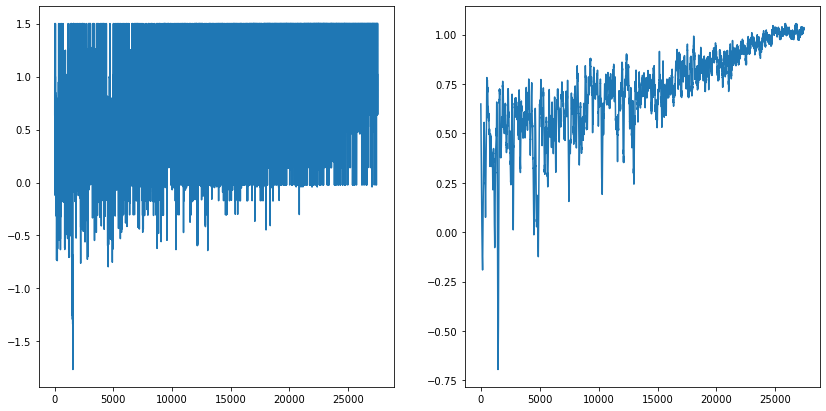

In [12]:
MovingAveragePlot(rewards, 100)

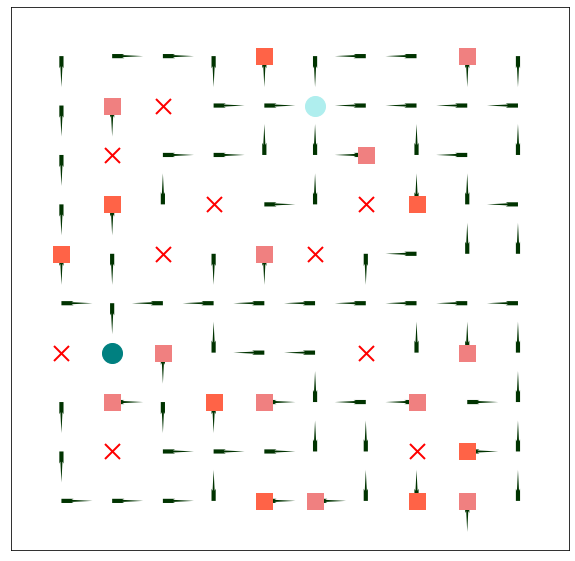

In [13]:
VectorFieldPlot(network_cnn, env, model_settings['width'], model_settings['height'])

In [5]:
config = settings.Config(epsilon=0.9, epsilon_low = 0.1, epsilon_step = 0.05, max_play_length=500, epochs = 1000, gamma = 0.9)
start_time = time.time()

env.grid_initial[0, env.init_row, env.init_col] = 0
env.grid_initial[0, 5, 5] = 1

env.init_row = 5
env.init_col = 5
env.reset()
env.display()
rewards, losses = TrainQlearning(network_cnn, env, config, reset_model = 0)

end_time = time.time()
print('Training time: %d seconds' % (end_time - start_time))

['  ', '  ', '  ', '  ', 'H1', '  ', '  ', '  ', 'H2', '  ']
['  ', 'H2', 'O ', '  ', '  ', 'T1', '  ', '  ', '  ', '  ']
['  ', 'O ', '  ', '  ', '  ', '  ', 'H2', '  ', '  ', '  ']
['  ', 'H1', '  ', 'O ', '  ', '  ', 'O ', 'H1', '  ', '  ']
['H1', '  ', 'O ', '  ', 'H2', 'O ', '  ', '  ', '  ', '  ']
['  ', '  ', '  ', '  ', '  ', 'P ', '  ', '  ', '  ', '  ']
['O ', 'T2', 'H2', '  ', '  ', '  ', 'O ', '  ', 'H2', '  ']
['  ', 'H2', '  ', 'H1', 'H2', '  ', '  ', 'H2', '  ', '  ']
['  ', 'O ', '  ', '  ', '  ', '  ', '  ', 'O ', 'H1', '  ']
['  ', '  ', '  ', '  ', 'H1', 'H2', '  ', 'H1', 'H2', '  ']
play round: 100, ave reward (last 100): -1.2344
play round: 200, ave reward (last 100): -0.2555
play round: 300, ave reward (last 100): 0.4810
play round: 400, ave reward (last 100): 0.7421
play round: 500, ave reward (last 100): 0.4400
play round: 600, ave reward (last 100): 0.8077
play round: 700, ave reward (last 100): 0.7546
play round: 800, ave reward (last 100): 0.8022
play round: 

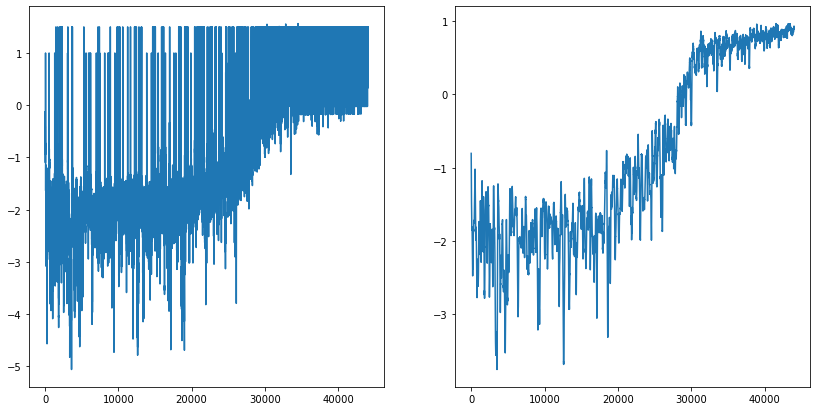

In [6]:
MovingAveragePlot(rewards, 100)

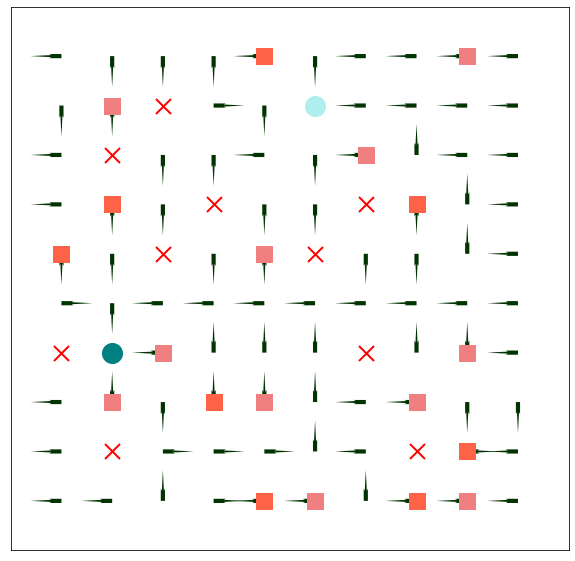

In [7]:
VectorFieldPlot(network_cnn, env, model_settings['width'], model_settings['height'])

In [14]:
config = settings.Config(epsilon=0.9, epsilon_low = 0.1, epsilon_step = 0.05, max_play_length=500, epochs = 2000, gamma = 0.9)
start_time = time.time()

env.grid_initial[0, env.init_row, env.init_col] = 0
env.grid_initial[0, 5, 5] = 1

env.init_row = 5
env.init_col = 5
env.reset()
env.display()
rewards, losses = TrainQlearning(network_cnn, env, config, reset_model = 0)

end_time = time.time()
print('Training time: %d seconds' % (end_time - start_time))

['  ', '  ', '  ', '  ', 'H1', '  ', '  ', '  ', 'H2', '  ']
['  ', 'H2', 'O ', '  ', '  ', 'T1', '  ', '  ', '  ', '  ']
['  ', 'O ', '  ', '  ', '  ', '  ', 'H2', '  ', '  ', '  ']
['  ', 'H1', '  ', 'O ', '  ', '  ', 'O ', 'H1', '  ', '  ']
['H1', '  ', 'O ', '  ', 'H2', 'O ', '  ', '  ', '  ', '  ']
['  ', '  ', '  ', '  ', '  ', 'P ', '  ', '  ', '  ', '  ']
['O ', 'T2', 'H2', '  ', '  ', '  ', 'O ', '  ', 'H2', '  ']
['  ', 'H2', '  ', 'H1', 'H2', '  ', '  ', 'H2', '  ', '  ']
['  ', 'O ', '  ', '  ', '  ', '  ', '  ', 'O ', 'H1', '  ']
['  ', '  ', '  ', '  ', 'H1', 'H2', '  ', 'H1', 'H2', '  ']
play round: 100, ave reward (last 100): 0.3941
play round: 200, ave reward (last 100): 0.4097
play round: 300, ave reward (last 100): 0.5594
play round: 400, ave reward (last 100): 0.4684
play round: 500, ave reward (last 100): 0.7143
play round: 600, ave reward (last 100): 0.7230
play round: 700, ave reward (last 100): 0.7692
play round: 800, ave reward (last 100): 0.7793
play round: 90

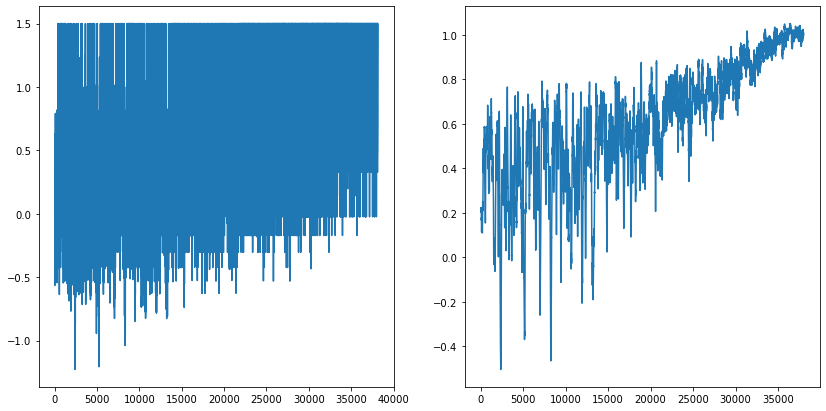

In [15]:
MovingAveragePlot(rewards, 100)

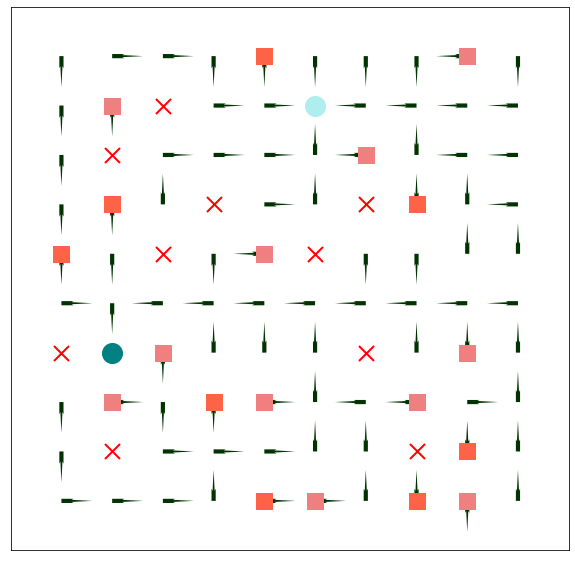

In [16]:
VectorFieldPlot(network_cnn, env, model_settings['width'], model_settings['height'])

In [19]:
config = settings.Config(epsilon=0.9, epsilon_low = 0.1, epsilon_step = 0.05, max_play_length=500, epochs = 500, gamma = 0.9)
start_time = time.time()

env.grid_initial[0, env.init_row, env.init_col] = 0
env.grid_initial[0, 5, 5] = 1

env.init_row = 5
env.init_col = 5
env.reset()
env.display()
rewards, losses = TrainQlearning(network_cnn, env, config, reset_model = 0)

end_time = time.time()
print('Training time: %d seconds' % (end_time - start_time))

['  ', '  ', '  ', '  ', 'H1', '  ', '  ', '  ', 'H2', '  ']
['  ', 'H2', 'O ', '  ', '  ', 'T1', '  ', '  ', '  ', '  ']
['  ', 'O ', '  ', '  ', '  ', '  ', 'H2', '  ', '  ', '  ']
['  ', 'H1', '  ', 'O ', '  ', '  ', 'O ', 'H1', '  ', '  ']
['H1', '  ', 'O ', '  ', 'H2', 'O ', '  ', '  ', '  ', '  ']
['  ', '  ', '  ', '  ', '  ', 'P ', '  ', '  ', '  ', '  ']
['O ', 'T2', 'H2', '  ', '  ', '  ', 'O ', '  ', 'H2', '  ']
['  ', 'H2', '  ', 'H1', 'H2', '  ', '  ', 'H2', '  ', '  ']
['  ', 'O ', '  ', '  ', '  ', '  ', '  ', 'O ', 'H1', '  ']
['  ', '  ', '  ', '  ', 'H1', 'H2', '  ', 'H1', 'H2', '  ']
play round: 100, ave reward (last 100): 0.7707
play round: 200, ave reward (last 100): 0.6032
play round: 300, ave reward (last 100): 0.4978
play round: 400, ave reward (last 100): 0.5612
play round: 500, ave reward (last 100): 0.8104
Training time: 88 seconds


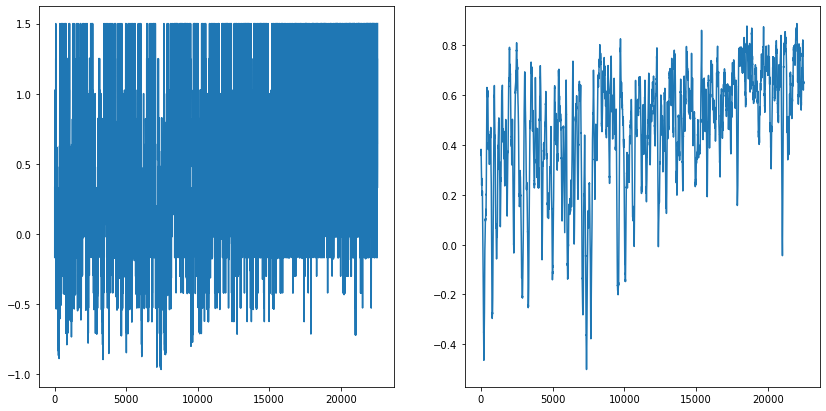

In [20]:
MovingAveragePlot(rewards, 100)

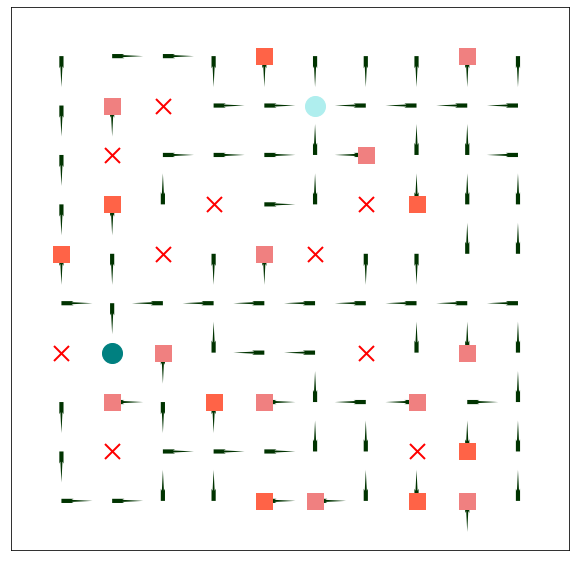

In [21]:
VectorFieldPlot(network_cnn, env, model_settings['width'], model_settings['height'])

In [31]:
config = settings.Config(epsilon=0.9, epsilon_low = 0.1, epsilon_step = 0.05, max_play_length=500, epochs = 1000, gamma = 0.9)
start_time = time.time()

env.grid_initial[0, env.init_row, env.init_col] = 0
env.grid_initial[0, 5, 5] = 1

env.init_row = 5
env.init_col = 5
env.reset()
env.display()
rewards, losses = TrainQlearning(network_cnn, env, config, reset_model = 0)

end_time = time.time()
print('Training time: %d seconds' % (end_time - start_time))

['  ', '  ', '  ', '  ', 'H1', '  ', '  ', '  ', 'H2', '  ']
['  ', 'H2', 'O ', '  ', '  ', 'T1', '  ', '  ', '  ', '  ']
['  ', 'O ', '  ', '  ', '  ', '  ', 'H2', '  ', '  ', '  ']
['  ', 'H1', '  ', 'O ', '  ', '  ', 'O ', 'H1', '  ', '  ']
['H1', '  ', 'O ', '  ', 'H2', 'O ', '  ', '  ', '  ', '  ']
['  ', '  ', '  ', '  ', '  ', 'P ', '  ', '  ', '  ', '  ']
['O ', 'T2', 'H2', '  ', '  ', '  ', 'O ', '  ', 'H2', '  ']
['  ', 'H2', '  ', 'H1', 'H2', '  ', '  ', 'H2', '  ', '  ']
['  ', 'O ', '  ', '  ', '  ', '  ', '  ', 'O ', 'H1', '  ']
['  ', '  ', '  ', '  ', 'H1', 'H2', '  ', 'H1', 'H2', '  ']
play round: 100, ave reward (last 100): 0.4326
play round: 200, ave reward (last 100): 0.2478
play round: 300, ave reward (last 100): 0.3080
play round: 400, ave reward (last 100): 0.5019
play round: 500, ave reward (last 100): 0.7788
play round: 600, ave reward (last 100): 0.7084
play round: 700, ave reward (last 100): 0.6675
play round: 800, ave reward (last 100): 0.7587
play round: 90

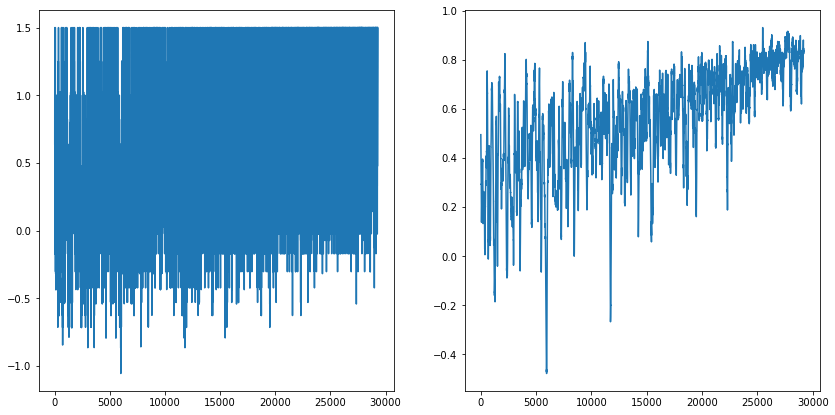

In [32]:
MovingAveragePlot(rewards, 100)

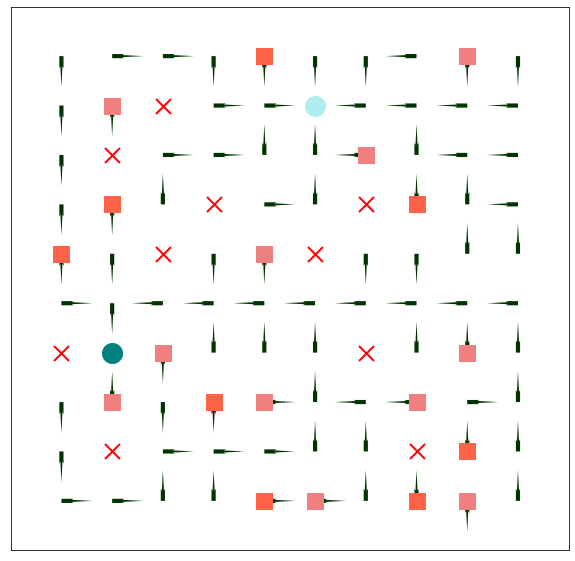

In [33]:
VectorFieldPlot(network_cnn, env, model_settings['width'], model_settings['height'])

In [28]:
config = settings.Config(epsilon=0.9, epsilon_low = 0.1, epsilon_step = 0.05, max_play_length=500, epochs = 1500, gamma = 0.9)
start_time = time.time()

env.grid_initial[0, env.init_row, env.init_col] = 0
env.grid_initial[0, 5, 5] = 1

env.init_row = 5
env.init_col = 5
env.reset()
env.display()
rewards, losses = TrainQlearning(network_cnn, env, config, reset_model = 0)

end_time = time.time()
print('Training time: %d seconds' % (end_time - start_time))

['  ', '  ', '  ', '  ', 'H1', '  ', '  ', '  ', 'H2', '  ']
['  ', 'H2', 'O ', '  ', '  ', 'T1', '  ', '  ', '  ', '  ']
['  ', 'O ', '  ', '  ', '  ', '  ', 'H2', '  ', '  ', '  ']
['  ', 'H1', '  ', 'O ', '  ', '  ', 'O ', 'H1', '  ', '  ']
['H1', '  ', 'O ', '  ', 'H2', 'O ', '  ', '  ', '  ', '  ']
['  ', '  ', '  ', '  ', '  ', 'P ', '  ', '  ', '  ', '  ']
['O ', 'T2', 'H2', '  ', '  ', '  ', 'O ', '  ', 'H2', '  ']
['  ', 'H2', '  ', 'H1', 'H2', '  ', '  ', 'H2', '  ', '  ']
['  ', 'O ', '  ', '  ', '  ', '  ', '  ', 'O ', 'H1', '  ']
['  ', '  ', '  ', '  ', 'H1', 'H2', '  ', 'H1', 'H2', '  ']
play round: 100, ave reward (last 100): 0.3900
play round: 200, ave reward (last 100): 0.4303
play round: 300, ave reward (last 100): 0.6429
play round: 400, ave reward (last 100): 0.5966
play round: 500, ave reward (last 100): 0.7355
play round: 600, ave reward (last 100): 0.6456
play round: 700, ave reward (last 100): 0.7386
play round: 800, ave reward (last 100): 0.7402
play round: 90

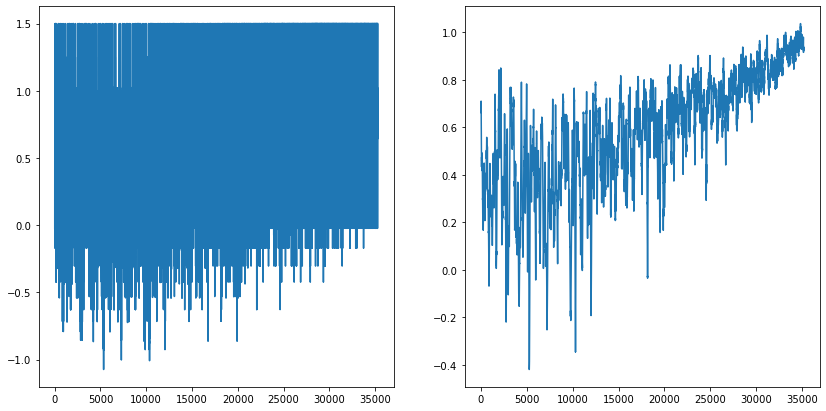

In [29]:
MovingAveragePlot(rewards, 100)

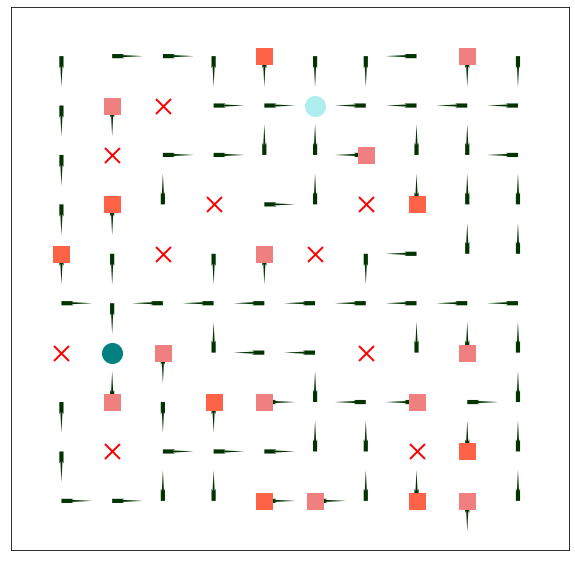

In [30]:
VectorFieldPlot(network_cnn, env, model_settings['width'], model_settings['height'])